# **Aula 1 - Preparando os Dados**

## **1.1 Apresentação**

## **1.2 Preparando o Ambiente**

### PySpark

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

<font size=2>**Fonte:** [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)</font>

In [1]:
!pip install pyspark


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\ander\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### SparkSession

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

<font size=2>**Fonte:** [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)</font>

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master('local[*]').appName("Classificação com Spark").getOrCreate()

In [4]:
spark

## **1.3 Carregamento dos Dados**

In [5]:
dados = spark.read.csv('dados_clientes.csv', sep=',', header=True, inferSchema=True)

In [6]:
dados

DataFrame[id: int, Churn: string, Mais65anos: int, Conjuge: string, Dependentes: string, MesesDeContrato: int, TelefoneFixo: string, MaisDeUmaLinhaTelefonica: string, Internet: string, SegurancaOnline: string, BackupOnline: string, SeguroDispositivo: string, SuporteTecnico: string, TVaCabo: string, StreamingFilmes: string, TipoContrato: string, ContaCorreio: string, MetodoPagamento: string, MesesCobrados: double]

In [7]:
dados.show()

+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
| id|Churn|Mais65anos|Conjuge|Dependentes|MesesDeContrato|TelefoneFixo|MaisDeUmaLinhaTelefonica|   Internet|   SegurancaOnline|      BackupOnline| SeguroDispositivo|    SuporteTecnico|           TVaCabo|   StreamingFilmes|TipoContrato|ContaCorreio| MetodoPagamento|MesesCobrados|
+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
|  0|  Nao|         0|    Sim|        Nao|              1|         Nao|    SemServicoTelefonico|        DSL|               Nao|               Sim|              

In [8]:
dados.count()

10348

In [9]:
dados.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



In [10]:
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- Conjuge: string (nullable = true)
 |-- Dependentes: string (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- TelefoneFixo: string (nullable = true)
 |-- MaisDeUmaLinhaTelefonica: string (nullable = true)
 |-- Internet: string (nullable = true)
 |-- SegurancaOnline: string (nullable = true)
 |-- BackupOnline: string (nullable = true)
 |-- SeguroDispositivo: string (nullable = true)
 |-- SuporteTecnico: string (nullable = true)
 |-- TVaCabo: string (nullable = true)
 |-- StreamingFilmes: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- ContaCorreio: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)



## **1.4 Transformando os Dados**

<font size=2>**Fonte:** [Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)</font>

In [11]:
colunasBinarias = [
    'Churn',
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica',
    'SegurancaOnline',
    'BackupOnline',
    'SeguroDispositivo',
    'SuporteTecnico',
    'TVaCabo',
    'StreamingFilmes',
    'ContaCorreio'
]

In [12]:
from pyspark.sql import functions as f

In [13]:
todasColunas = [f.when(f.col(c)=='Sim', 1).otherwise(0).alias(c) for c in colunasBinarias]

In [14]:
for coluna in reversed(dados.columns):
  if coluna not in colunasBinarias:
    todasColunas.insert(0, coluna)
todasColunas

['id',
 'Mais65anos',
 'MesesDeContrato',
 'Internet',
 'TipoContrato',
 'MetodoPagamento',
 'MesesCobrados',
 Column<'CASE WHEN (Churn = Sim) THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN (Conjuge = Sim) THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN (Dependentes = Sim) THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN (TelefoneFixo = Sim) THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN (MaisDeUmaLinhaTelefonica = Sim) THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN (SegurancaOnline = Sim) THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN (BackupOnline = Sim) THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN (SeguroDispositivo = Sim) THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN (SuporteTecnico = Sim) THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN (TVaCabo = Sim) THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN (StreamingFilmes = Sim) THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column<'CASE WHEN (ContaCorr

In [15]:
dados.select(todasColunas).show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

In [16]:
dataset = dados.select(todasColunas)

In [17]:
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- Internet: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)



## **1.5 Criando *Dummies***

In [18]:
dados.select(['Internet', 'TipoContrato', 'MetodoPagamento']).show()

+-----------+------------+----------------+
|   Internet|TipoContrato| MetodoPagamento|
+-----------+------------+----------------+
|        DSL| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|          Boleto|
|        DSL| Mensalmente|          Boleto|
|        DSL|       UmAno|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|   CartaoCredito|
|        DSL| Mensalmente|          Boleto|
|FibraOptica| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|   DebitoEmConta|
|        DSL| Mensalmente|          Boleto|
|        Nao|    DoisAnos|   CartaoCredito|
|FibraOptica|       UmAno|   CartaoCredito|
|FibraOptica| Mensalmente|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica|    DoisAnos|   CartaoCredito|
|        Nao|       UmAno|          Boleto|
|FibraOptica|    DoisAnos|   DebitoEmConta|
|        DSL| Mensalmente|   CartaoCredito|
|FibraOptica| Mensalmente|Boleto

In [19]:
dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0).show()

+----+---+-----------+---+
|  id|DSL|FibraOptica|Nao|
+----+---+-----------+---+
|7982|  1|          0|  0|
|9465|  0|          1|  0|
|2122|  1|          0|  0|
|3997|  1|          0|  0|
|6654|  0|          1|  0|
|7880|  0|          1|  0|
|4519|  0|          1|  0|
|6466|  0|          1|  0|
| 496|  1|          0|  0|
|7833|  0|          1|  0|
|1591|  0|          0|  1|
|2866|  0|          1|  0|
|8592|  0|          1|  0|
|1829|  0|          1|  0|
| 463|  0|          1|  0|
|4900|  0|          1|  0|
|4818|  0|          1|  0|
|7554|  1|          0|  0|
|1342|  0|          0|  1|
|5300|  0|          1|  0|
+----+---+-----------+---+
only showing top 20 rows



In [20]:
Internet = dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0)
TipoContrato = dataset.groupBy('id').pivot('TipoContrato').agg(f.lit(1)).na.fill(0)
MetodoPagamento = dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0)

In [21]:
dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    )\
    .drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    )\
    .show()


+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [22]:
dataset = dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    )\
    .drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    )

In [23]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [24]:
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)
 |-- Internet_DSL: integer (nullable = true)
 |-- Internet_FibraOptica: integer (nullable = true)
 |-- Internet_Nao: integer (nullable = true)
 |-- TipoContrato_Mensalmente: integer (nullable = true)
 |-- TipoContrato_UmAno: integer (nullable = true)
 |-- TipoContr

# **Aula 2 - Regressão Logística**

## **2.1 O Modelo**


A regressão logística é um método popular para prever uma resposta categórica. É um caso especial de modelos Lineares Generalizados que prevê a probabilidade dos resultados. Em `spark.ml`, a regressão logística pode ser usada para prever um resultado binário usando regressão logística binomial ou pode ser usada para prever um resultado multiclasse usando regressão logística multinomial. Use o parâmetro `family` para selecionar entre esses dois algoritmos ou deixe-o indefinido e o Spark inferirá a variante correta.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression)</font>

 <img src="https://miro.medium.com/max/1400/0*1KnKYuv0UDu_1-qM.gif?width=1191&height=670" alt="Minha Figura">


## **2.2 Preparação dos Dados**

In [25]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [26]:
from pyspark.ml.feature import VectorAssembler

In [27]:
dataset = dataset.withColumnRenamed('Churn', 'label')

In [28]:
X = dataset.columns
X.remove('label')
X.remove('id')
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [29]:
assembler = VectorAssembler(inputCols=X, outputCol='features')

In [30]:
dataset_prep = assembler.transform(dataset).select('features', 'label')

In [31]:
dataset_prep.show(10, truncate=False)

+-----------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                   |label|
+-----------------------------------------------------------------------------------------------------------+-----+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])                               |1    |
|(24,[1,2,3,5,6,8,9,11,12,13,15,17,22],[60.0,103.6142230120257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1    |
|(24,[1,2,5,6,10,11,12,13,14,18,23],[12.0,75.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                       |0    |
|(24,[1,2,3,5,8,12,13,14,19,21],[69.0,61.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                               |0    |
|(24,[1,2,3,5,6,11,13,15,17,22],[7.0,86.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                 |1    |
|(24,[1,2,5,6,12,13,15,17,22],[14.0,85.03742670311915,1.0,1.0,1.0,1.0,1.

## **2.3 Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[randomSplit](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html)</font> |
<font size=2>[LogisticRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegression.html)</font>

In [32]:
SEED = 101

In [33]:
treino, teste = dataset_prep.randomSplit([0.7, 0.3], seed=SEED)

In [34]:
treino.count()

7206

In [35]:
teste.count()

3142

In [36]:
from pyspark.ml.classification import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
modelo_lr = lr.fit(treino)

In [39]:
previsoes_lr_teste = modelo_lr.transform(teste)

In [40]:
previsoes_lr_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[3.02174179751551...|[0.95354674000282...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.0922192966076...|[0.47696150091605...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[0.18744121711361...|[0.54672358463156...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[0.91716501260103...|[0.71446410549163...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.1495904711610...|[0.46267196467801...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.1680594619286...|[0.45808374494006...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[-1.4170949608173...|[0.19511740608882...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[0.14194260698794...|[0.53542619200881...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[0.67046644011599...|[0.66160759507905...|       0.0|
|(24,[0,1,2,3,4,

## **2.4 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[LogisticRegressionTrainingSummary](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegressionTrainingSummary.html)</font>

In [41]:
resumo_lr_treino = modelo_lr.summary

In [42]:
resumo_lr_treino.accuracy

0.7849014709963918

In [43]:
print("Acurácia: %f" % resumo_lr_treino.accuracy)
print("Precisão: %f" % resumo_lr_treino.precisionByLabel[1])
print("Recall: %f" % resumo_lr_treino.recallByLabel[1])
print("F1: %f" % resumo_lr_treino.fMeasureByLabel()[1])

Acurácia: 0.784901
Precisão: 0.770686
Recall: 0.812517
F1: 0.791049


In [44]:
previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()

1256

In [45]:
tp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
tn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
fp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
fn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()
print(tp, tn,fp, fn)

1256 1179 400 307


In [46]:
def calcula_mostra_matriz_confusao(df_transform_modelo, normalize=False, percentage=True):
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()
  
  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn
  
  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  print(' '*20, 'Previsto')
  print(' '*15, 'Churn', ' '*5 ,'Não-Churn')
  print(' '*4, 'Churn', ' '*6, int(tp/valorP), ' '*7, int(fn/valorP))
  print('Real')
  print(' '*4, 'Não-Churn', ' '*2, int(fp/valorN), ' '*7, int(tn/valorN))

In [47]:
calcula_mostra_matriz_confusao(previsoes_lr_teste, normalize=False)

                     Previsto
                Churn       Não-Churn
     Churn        1256         307
Real
     Não-Churn    400         1179


# **Aula 3 - Árvore de Decisão - Classificação**

## **3.1 O Modelo**


As árvores de decisão são métodos populares para tarefas de *machine learning* de classificação e regressão. As árvores de decisão são amplamente utilizadas por serem fáceis de interpretar, lidar com *features* categóricas e contínuas, podem ser aplicadas a problemas de classificação com múltiplas classes e não requerem padronização dos dados. Algoritmos de conjunto de árvores, como *Random Forest* e *Boosting*, estão entre os de melhor desempenho para tarefas de classificação e regressão.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier)
| [Decision trees](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-trees)</font>

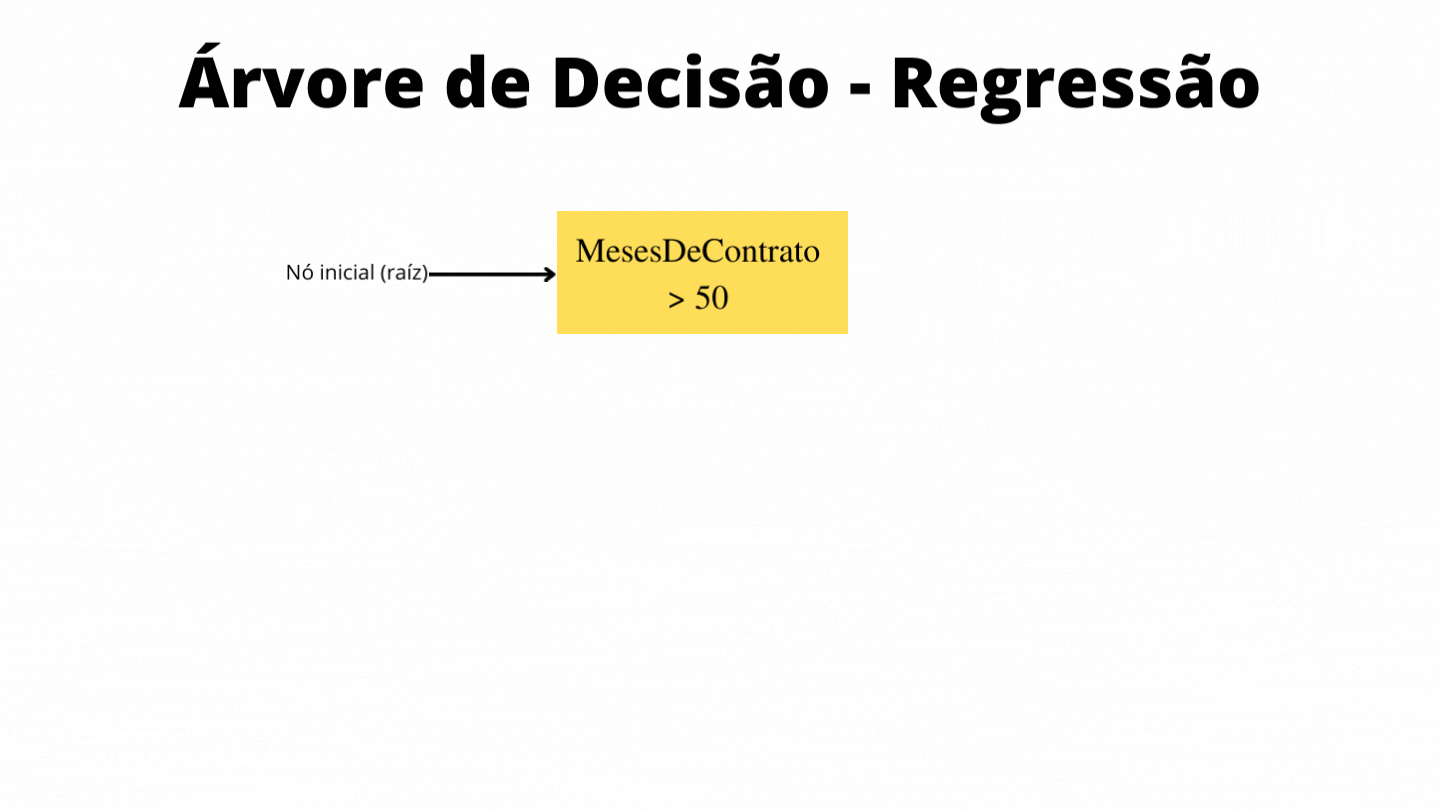

## **3.2 Ajuste e Previsão**


<font size=2>**Documentação:**</font>
<font size=2>[DecisionTreeClassifier](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html)</font>

In [48]:
from pyspark.ml.classification import DecisionTreeClassifier

In [49]:
dtc = DecisionTreeClassifier(seed=SEED)

In [50]:
modelo_dtc = dtc.fit(treino)

In [51]:
previsoes_dtc_treino = modelo_dtc.transform(treino)

In [52]:
previsoes_dtc_treino.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,

## **3.3 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[MulticlassClassificationEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html)</font>

In [53]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [54]:
evaluator = MulticlassClassificationEvaluator()

In [55]:
evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: 'accuracy'})

0.7917013599777962

In [56]:
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664


In [57]:
previsoes_dtc_teste = modelo_dtc.transform(teste)

In [58]:
previsoes_dtc_teste.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [62.0,128.0]|[0.32631578947368...|       1.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [51.0,141.0]| [0.265625,0.734375]|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [63.0,118.0]|[0.34806629834254...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,

In [59]:
evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: 'accuracy'})

0.7714831317632082

In [60]:
print('Decision Tree Classifier')
print("="*40)
print("Dados de Treino")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_treino, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))
print("")
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Decision Tree Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2784         827
Real
     Não-Churn    674         2921
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1181         382
Real
     Não-Churn    336         1243
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.771483
Precisão: 0.778510
Recall: 0.755598
F1: 0.766883


# **Aula 4 - Random forest - Classificação**

## **4.1 O Modelo**

*Random Forests* (Florestas aleatórias) são conjuntos de árvores de decisão. *Random Forests* combinam muitas árvores de decisão para reduzir o risco de *overfitting*. A implementação `spark.ml` dá suporte a *random forests* para classificação binária ou multiclasse e para regressão, usando *features* contínuas e categóricas.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier)
| [Random Forests](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forests)</font>

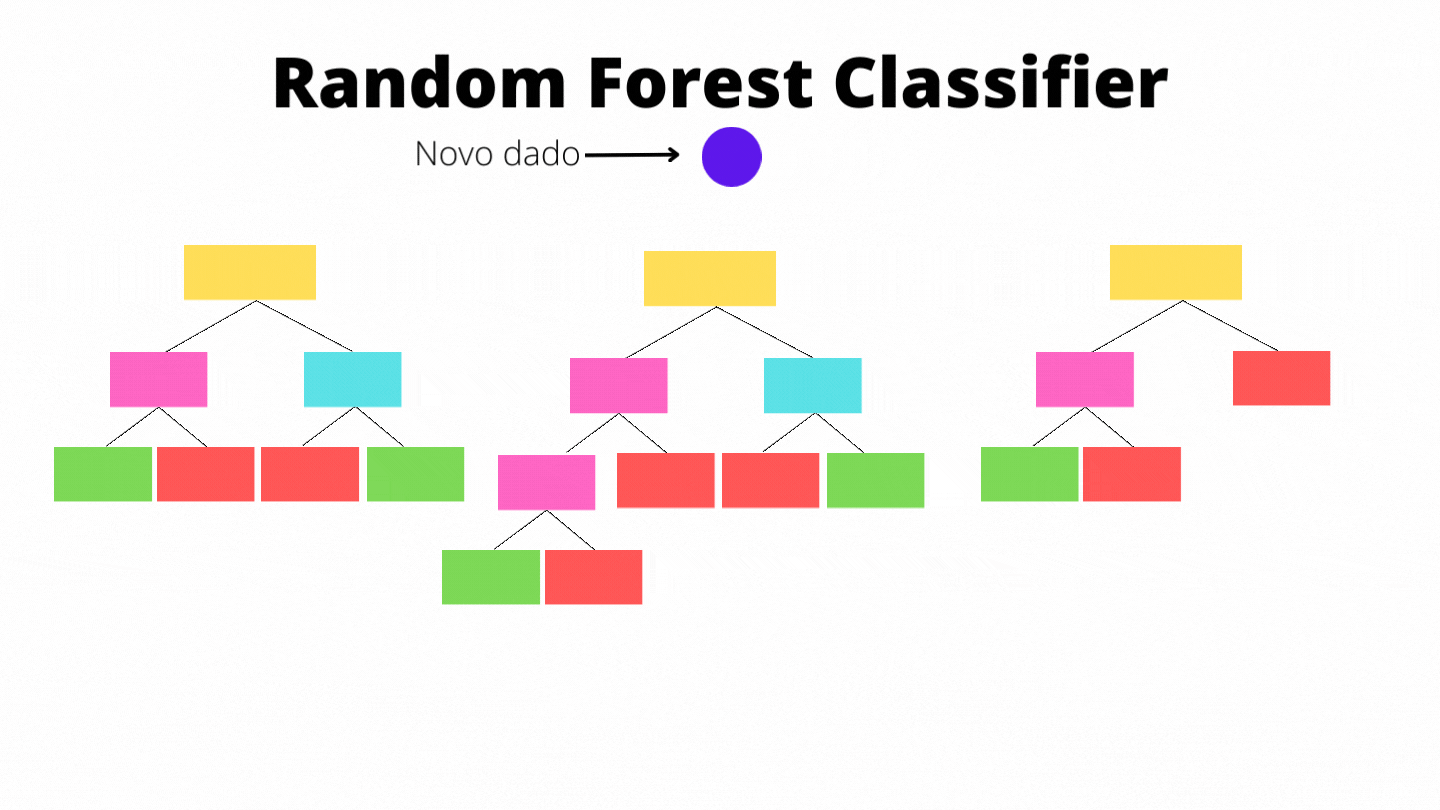

## **4.2 Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[RandomForestClassifier](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html#randomforestclassifier)</font>

In [61]:
from pyspark.ml.classification import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(seed=SEED)

In [63]:
modelo_rfc = rfc.fit(treino)

In [64]:
previsoes_rfc_treino = modelo_rfc.transform(treino)

In [65]:
previsoes_rfc_treino.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[15.0052773466704...|[0.75026386733352...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[16.9295040273249...|[0.84647520136624...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[8.59288938528764...|[0.42964446926438...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.59647122885698...|[0.27982356144284...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.21616013157118...|[0.26080800657855...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[5.45640255581361...|[0.27282012779068...|       1.0|
|(24,[0,1,2,3,4,

## **4.3 Métricas**

In [66]:
previsoes_rfc_teste = modelo_rfc.transform(teste)

In [67]:
previsoes_rfc_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[16.7433871675615...|[0.83716935837807...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[7.27313214599648...|[0.36365660729982...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[7.46885072161585...|[0.37344253608079...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.79829004739264...|[0.38991450236963...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.13263407834549...|[0.35663170391727...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[4.45872635511159...|[0.22293631775557...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.84691519125130...|[0.39234575956256...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.94796150783366...|[0.49739807539168...|       1.0|
|(24,[0,1,2,3,4,

In [68]:
print('Random Forest Classifier')
print("="*40)
print("Dados de Treino")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_treino, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))
print("")
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Random Forest Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2950         661
Real
     Não-Churn    884         2711
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.785595
Precisão: 0.769431
Recall: 0.816948
F1: 0.792478

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1257         306
Real
     Não-Churn    416         1163
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.770210
Precisão: 0.751345
Recall: 0.804223
F1: 0.776885


# **Aula 5 - Técnicas de Otimização**

## **5.1 Ferramentas**

Uma tarefa importante em modelagens de machine learning é a escolha do melhor modelo através da otimização dos seus hiperparâmetros. Isso também é conhecido como *tuning*. Procedimentos de *tuning* podem ser feitos para estimadores individuais, como em uma árvore de decisão, ou para *pipelines* inteiros que podem incluir vários algoritmos.

<font size=2>**Fonte:** [ML Tuning](https://spark.apache.org/docs/latest/ml-tuning.html)</font>

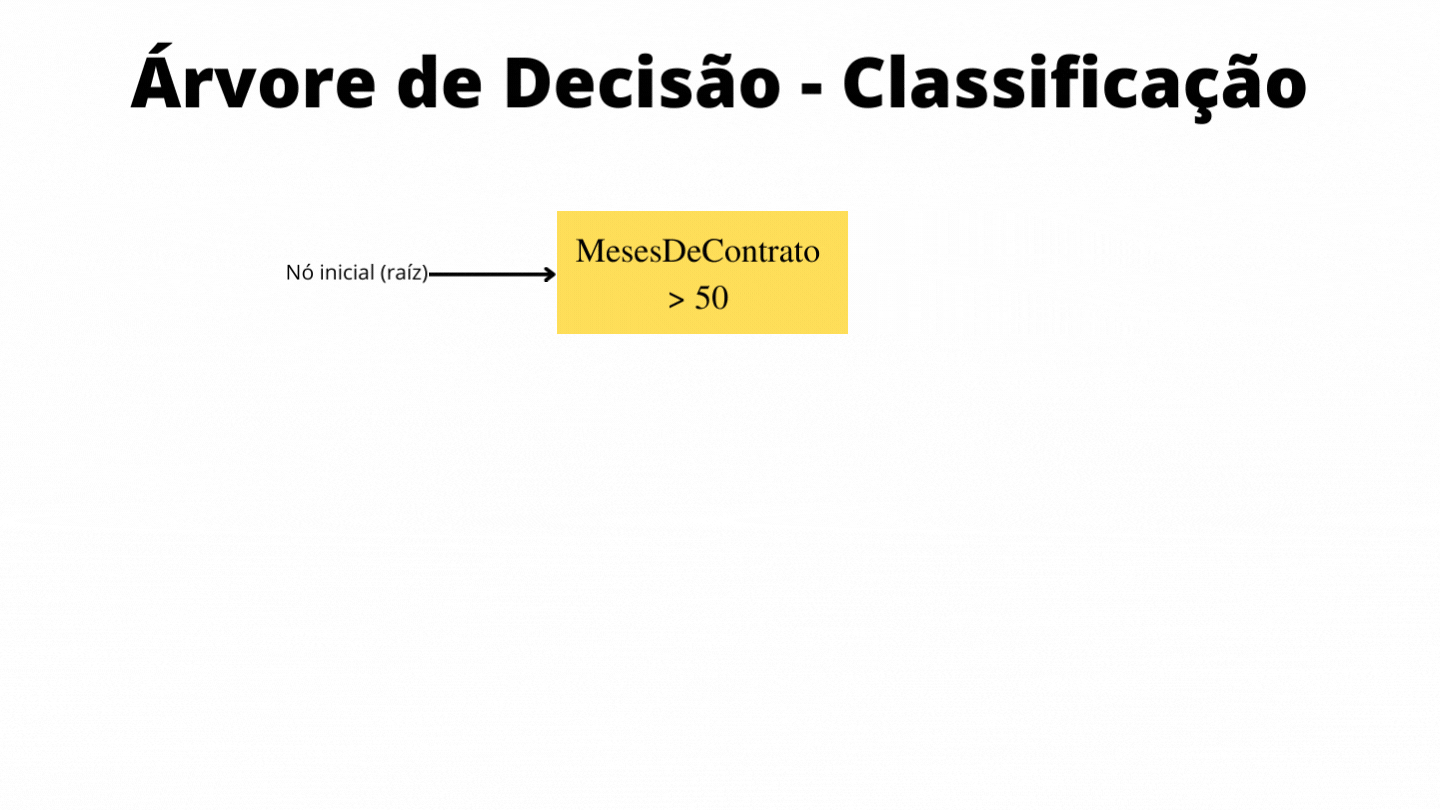

## **5.2 Árvore de Decisão com Cross Validation**

<font size=2>**Documentação:**</font>
<font size=2>[CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html)</font> |
<font size=2>[ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html)</font>

In [69]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [70]:
dtc = DecisionTreeClassifier(seed=SEED)

In [71]:
grid = ParamGridBuilder()\
        .addGrid(dtc.maxDepth, [2, 5, 10])\
        .addGrid(dtc.maxBins, [10, 32, 45])\
        .build()

In [72]:
evaluator = MulticlassClassificationEvaluator()

In [73]:
dtc_cv = CrossValidator(
    estimator=dtc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [74]:
modelo_dtc_cv = dtc_cv.fit(treino)

In [75]:
previsoes_dtc_cv_teste = modelo_dtc_cv.transform(teste)

In [76]:
print('Decision Tree Classifier - Tuning')
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_cv_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Decision Tree Classifier - Tuning
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1327         236
Real
     Não-Churn    423         1156
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.790261
Precisão: 0.758286
Recall: 0.849008
F1: 0.801087


## **5.3 Random Forest com Cross Validation**


In [77]:
rfc = RandomForestClassifier(seed=SEED)

In [78]:
grid = ParamGridBuilder()\
        .addGrid(rfc.maxDepth, [2, 5, 10])\
        .addGrid(rfc.maxBins, [10, 32, 45])\
        .addGrid(rfc.numTrees, [10, 20, 50])\
        .build()

In [79]:
evaluator = MulticlassClassificationEvaluator()

In [80]:
rfc_cv = CrossValidator(
    estimator=rfc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [81]:
modelo_rfc_cv = rfc_cv.fit(treino)

In [82]:
previsoes_rfc_cv_teste = modelo_rfc_cv.transform(teste)

In [83]:
print('Random Forest Classifier - Tuning')
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_cv_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Random Forest Classifier - Tuning
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1322         241
Real
     Não-Churn    347         1232
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.812858
Precisão: 0.792091
Recall: 0.845809
F1: 0.818069


In [84]:
melhor_modelo_rfc_cv = modelo_rfc_cv.bestModel

In [85]:
print(melhor_modelo_rfc_cv.getMaxDepth())
print(melhor_modelo_rfc_cv.getMaxBins())
print(melhor_modelo_rfc_cv.getNumTrees)

10
45
20


In [86]:
rfc_tunning = RandomForestClassifier(maxDepth=10, maxBins=45, numTrees=10, seed=SEED)

In [87]:
modelo_rfc_tunning = rfc_tunning.fit(dataset_prep)

In [88]:
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [89]:
novo_cliente = [{
    'Mais65anos': 0,
    'MesesDeContrato': 1,
    'MesesCobrados': 45.30540797610398,
    'Conjuge': 0,
    'Dependentes': 0,
    'TelefoneFixo': 0,
    'MaisDeUmaLinhaTelefonica': 0,
    'SegurancaOnline': 0,
    'BackupOnline': 0,
    'SeguroDispositivo': 0,
    'SuporteTecnico': 0,
    'TVaCabo': 1,
    'StreamingFilmes': 1,
    'ContaCorreio': 1,
    'Internet_DSL': 1,
    'Internet_FibraOptica': 0,
    'Internet_Nao': 0,
    'TipoContrato_Mensalmente': 1,
    'TipoContrato_UmAno': 0,
    'TipoContrato_DoisAnos': 0,
    'MetodoPagamento_DebitoEmConta': 0,
    'MetodoPagamento_CartaoCredito': 0,
    'MetodoPagamento_BoletoEletronico': 1,
    'MetodoPagamento_Boleto': 0
}]

In [90]:
novo_cliente = spark.createDataFrame(novo_cliente)
novo_cliente.show()

+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+-----------------+---------------+----------------------+--------------------------------+-----------------------------+-----------------------------+---------------+-----------------+---------------+--------------+-------+------------+---------------------+------------------------+------------------+
|BackupOnline|Conjuge|ContaCorreio|Dependentes|Internet_DSL|Internet_FibraOptica|Internet_Nao|Mais65anos|MaisDeUmaLinhaTelefonica|    MesesCobrados|MesesDeContrato|MetodoPagamento_Boleto|MetodoPagamento_BoletoEletronico|MetodoPagamento_CartaoCredito|MetodoPagamento_DebitoEmConta|SegurancaOnline|SeguroDispositivo|StreamingFilmes|SuporteTecnico|TVaCabo|TelefoneFixo|TipoContrato_DoisAnos|TipoContrato_Mensalmente|TipoContrato_UmAno|
+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+----

In [91]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

In [92]:
novo_cliente_prep = assembler.transform(novo_cliente).select('features')

In [93]:
novo_cliente_prep.show(truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])|
+----------------------------------------------------------------------------+



In [94]:
modelo_rfc_tunning.transform(novo_cliente_prep).show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(24,[1,2,11,12,13...|[1.24640781461703...|[0.12464078146170...|       1.0|
+--------------------+--------------------+--------------------+----------+

